In [2]:
import os
from email.parser import Parser
import email.utils
import time
import datetime
from dateutil.parser import parse
import glob

try:
    os.chdir('C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/')
except:
    pass


raw_inbox_data=[]
frequency_date = {}
frequency_calendar = {}

file_list = glob.glob("midterm\\data\\enron\\maildir\\*")

for filename in file_list:
    for x in os.listdir(filename):
        if (x=='inbox')or(x=='notes_inbox'):
            for y in os.listdir(filename+'/'+x):
                ab_path=filename+'/'+x+'/'+y
                try:
                    f = open(ab_path, "r")
                    string = f.read()
                    email = Parser().parsestr(string)
                    dt = parse(email['date'])
                    clean_mmyy=(dt.strftime('%m/%Y'))
                    if clean_mmyy not in frequency_date:  
                        frequency_date[clean_mmyy] = 1
                    else: frequency_date[clean_mmyy]+=1 
                except Exception:
                    pass    
        elif (x=='calendar'):
            for y in os.listdir(filename+'/'+x):
                ab_path=filename+'/'+x+'/'+y
                try:
                    f = open(ab_path, "r")
                    string = f.read()
                    email = Parser().parsestr(string)
                    dt = parse(email['date'])
                    clean_mmyy=(dt.strftime('%m/%Y'))
                    if clean_mmyy not in frequency_calendar :  
                        frequency_calendar [clean_mmyy] = 1
                    else: frequency_calendar [clean_mmyy]+=1 
                except Exception:
                    pass 
                
print('Execution Complete!')

Execution Complete!


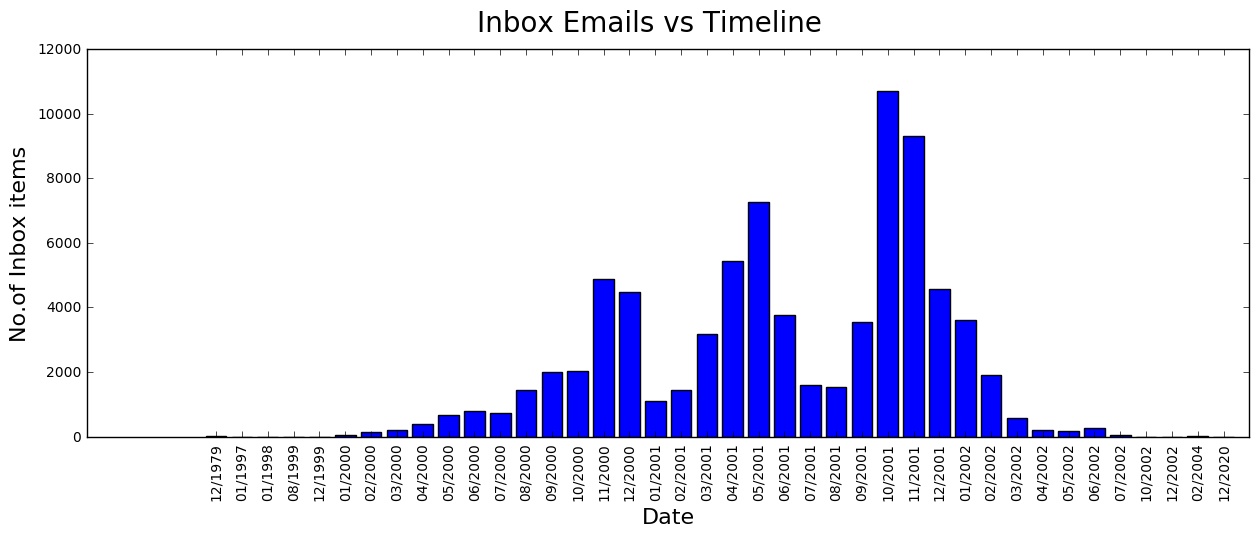

In [3]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Inbox Emails vs Timeline', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('No.of Inbox items', fontsize=16)
plt.bar(range(len(frequency_date)), [v[1] for v in sorted(frequency_date.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))], align='center')
plt.xticks(range(len(frequency_date)), [v[0] for v in sorted(frequency_date.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))],rotation='vertical')

plt.show()


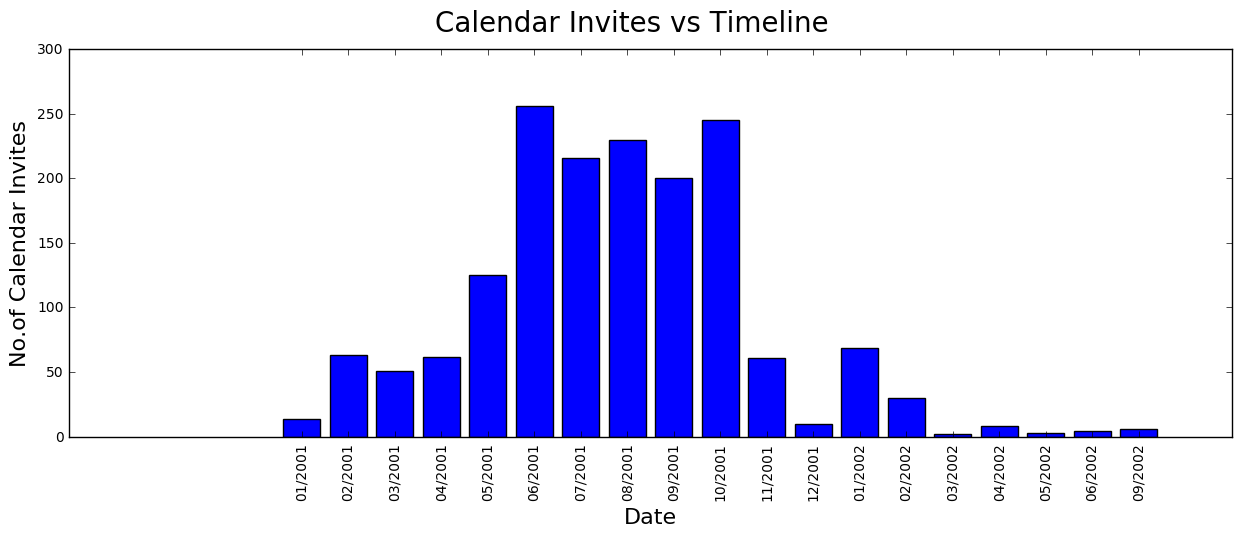

In [4]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Calendar Invites vs Timeline', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('No.of Calendar Invites', fontsize=16)
plt.bar(range(len(frequency_calendar)), [v[1] for v in sorted(frequency_calendar.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))], align='center')
plt.xticks(range(len(frequency_calendar)), [v[0] for v in sorted(frequency_calendar.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))],rotation='vertical')

plt.show()
